In [1]:
#Circuitos
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info.operators.predicates import is_unitary_matrix
from qiskit.quantum_info import SparsePauliOp # Para observables concretos...

## Simuladores
from qiskit import Aer, transpile, assemble

# Parametros
from qiskit.circuit import ParameterVector
from qiskit.circuit import Parameter
from qiskit.circuit import ParameterExpression

#ML
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor
from qiskit_machine_learning.connectors import TorchConnector
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import L_BFGS_B

#Numpy y math
import math
import matplotlib.pyplot as plt
import numpy as np

# pytorch
import torch

In [2]:
def QSP_circ_GateDecompose(phi, W):
    
    circ = QuantumCircuit(1)
    circ.h(0)
    for angle in phi[:-1]:
        circ.rz(angle, 0)
        circ.rz(math.pi/2,0)
        circ.ry(2*math.acos(W),0)
        circ.rz(-math.pi/2,0)

    circ.rz(phi[-1], 0)  # final rotation
    circ.h(0)  # change of basis |+> , |->
    return circ

Veamos un ejemplo de un circuito como el anterior

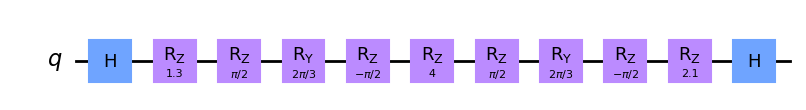

In [3]:
cirz = QSP_circ_GateDecompose([1.3,4,2.1] , np.array(1/2) )
cirz.draw('mpl')

Veamos a nivel teórico como se calculan los polinomios

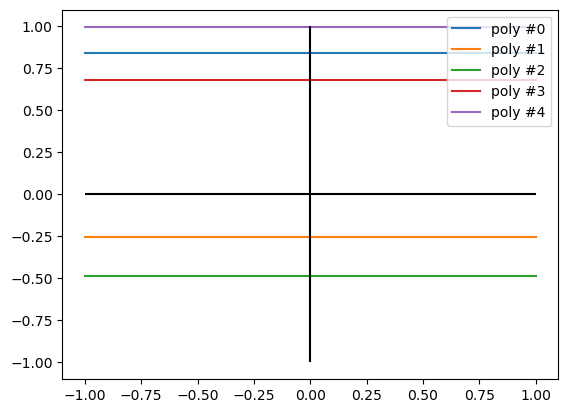

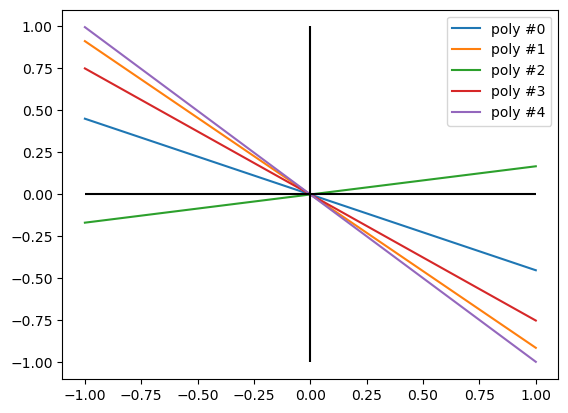

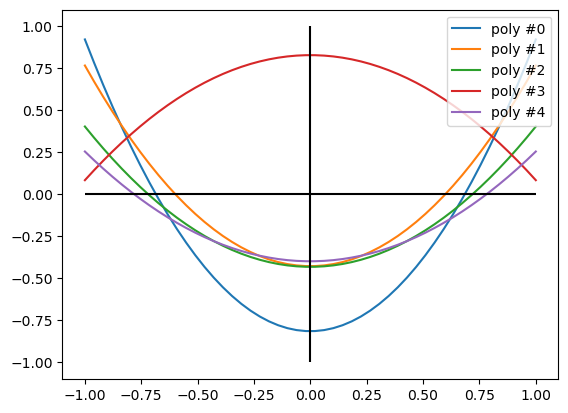

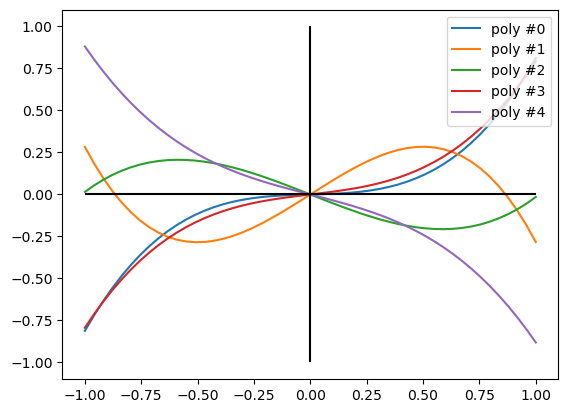

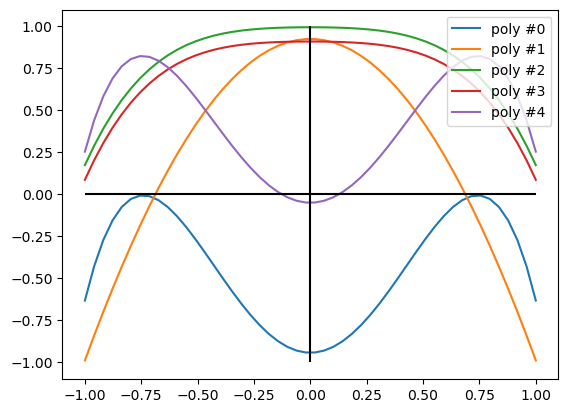

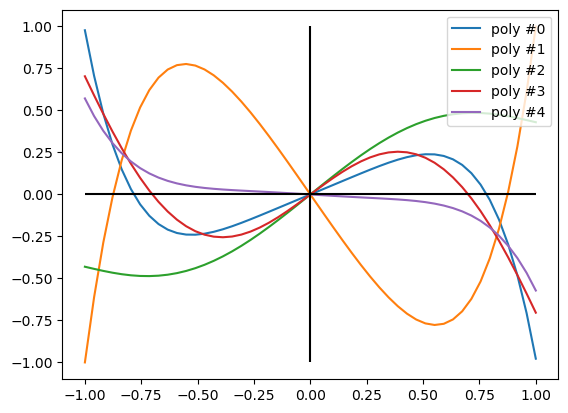

In [4]:
d=5
nPolis=5

a_vals = np.linspace(-1, 1, 50)
phi = np.linspace(-1,1,50)
w_mats = a_vals

np.random.seed(444422)

for j in range(d+1):
    for i in range(nPolis):
        phi = np.random.rand(j+1) * 2 * math.pi
        y_vals = []
        for w in w_mats:
            a=Operator(QSP_circ_GateDecompose(phi,w)).data[0,0].real
            y_vals.append(a)
            
        plt.plot(a_vals, y_vals, label=f"poly #{i}")

    plt.vlines(0.0, -1.0, 1.0, color="black")
    plt.hlines(0.0, -1.0, 1.0, color="black")
    plt.legend(loc=1)
    plt.show()

Ahora veamoslo por conteo de ticks de la medición 0, solo lo ejecutaremos para los polinomios de grado 5 por simplicidad.

In [5]:
def QSP_circ_GateDecompose_Measurement(phi, W):
    
    circ = QuantumCircuit(1,1)
    circ.h(0)
    for angle in phi[:-1]:
        circ.rz(angle, 0)
        circ.rz(math.pi/2,0)
        circ.ry(2*math.acos(W),0)
        circ.rz(-math.pi/2,0)

    circ.rz(phi[-1], 0)  # final rotation
    circ.h(0)  # change of basis |+> , |->
    circ.measure(0,0)
    return circ

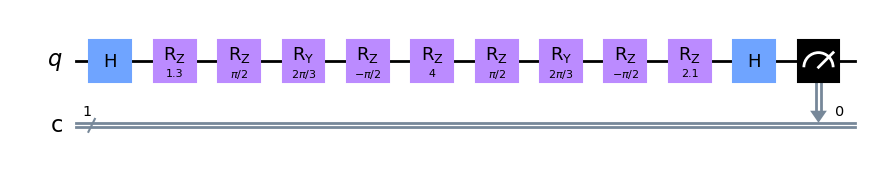

In [6]:
cirz = QSP_circ_GateDecompose_Measurement([1.3,4,2.1] , np.array(1/2) )
cirz.draw('mpl')

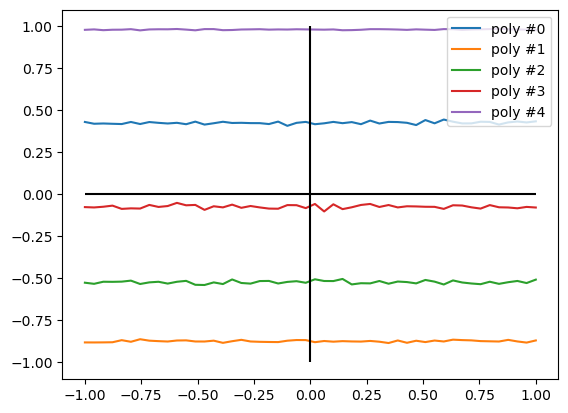

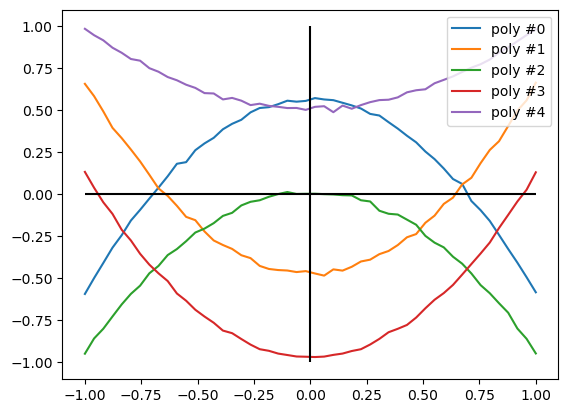

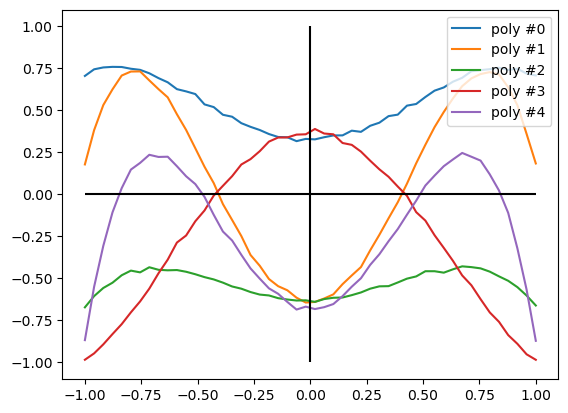

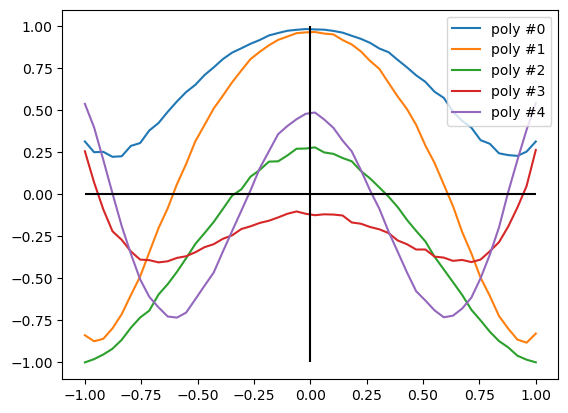

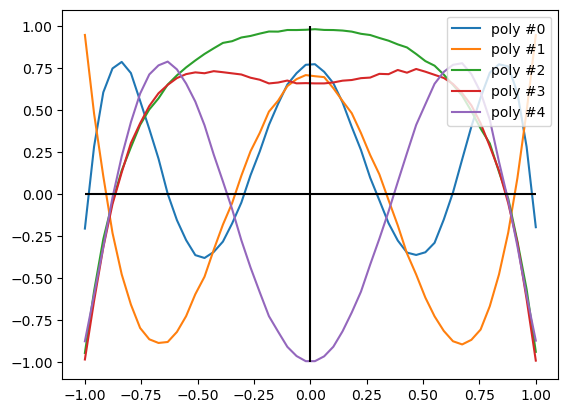

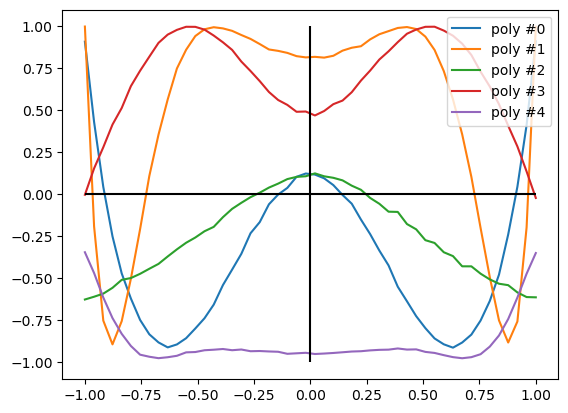

In [7]:
d=5
nPolis=5
backend_sim = Aer.get_backend('qasm_simulator')
a_vals = np.linspace(-1, 1, 50)
phi = np.linspace(-1,1,50)
w_mats = a_vals
shots=10000
np.random.seed(444422)

for j in range(d+1):
    for i in range(nPolis):
        phi = np.random.rand(j+1) * 2 * math.pi
        y_vals = []
        for w in w_mats:

            circ = QSP_circ_GateDecompose_Measurement(phi,w)
            t_circ = transpile(circ, backend_sim) 
            a_circ = assemble(t_circ, shots=shots)
            job = backend_sim.run(a_circ)
            result = job.result().get_counts()
            y_vals.append(2*(result['0']/shots) - 1)

        plt.plot(a_vals, y_vals, label=f"poly #{i}")

    plt.vlines(0.0, -1.0, 1.0, color="black")
    plt.hlines(0.0, -1.0, 1.0, color="black")
    plt.legend(loc=1)
    plt.show()